In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# import the data and drop unnamed first columns
beer = pd.read_csv('beers.csv')
beer = beer.drop(beer.columns[0], axis=1)
brew = pd.read_csv('breweries.csv')
brew.columns = ['brewery_id', 'brew_name', 'city', 'state']

In [4]:
# merge beer and brewery data together
df = pd.merge(beer, brew, on='brewery_id', how='inner')

In [5]:
# Fill abv NA values with mean
df['abv'] = df['abv'].fillna(df['abv'].mean())

In [6]:
# turn abv values into percentages
df['abv'] = df['abv'].apply(lambda z: z*100)

In [7]:
print(df.head())

   abv  ibu    id                 name                           style  \
0  5.0  NaN  1436             Pub Beer             American Pale Lager   
1  6.6  NaN  2265          Devil's Cup         American Pale Ale (APA)   
2  7.1  NaN  2264  Rise of the Phoenix                    American IPA   
3  9.0  NaN  2263             Sinister  American Double / Imperial IPA   
4  7.5  NaN  2262        Sex and Candy                    American IPA   

   brewery_id  ounces                  brew_name  city state  
0         408    12.0  10 Barrel Brewing Company  Bend    OR  
1         177    12.0        18th Street Brewery  Gary    IN  
2         177    12.0        18th Street Brewery  Gary    IN  
3         177    12.0        18th Street Brewery  Gary    IN  
4         177    12.0        18th Street Brewery  Gary    IN  


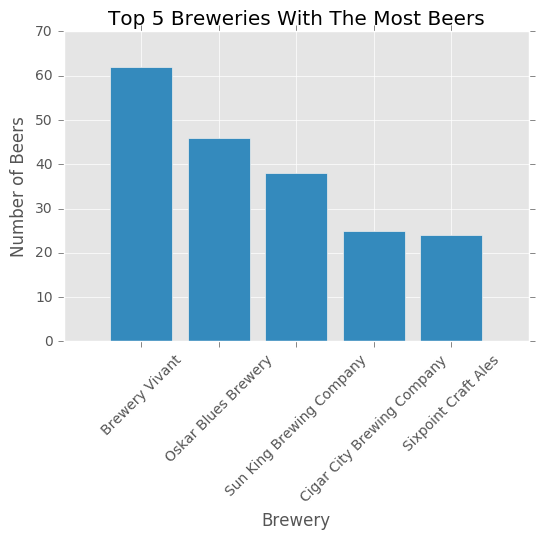

In [8]:
# Plot the top 5 breweries with the most beers
x = []
y = df['brew_name'].value_counts().nlargest(5)
for i in range(len(y)):
    x.append(i)
plt.bar(x, y, align='center')
plt.xticks(x, y.index.tolist(), rotation=45)
plt.xlabel('Brewery')
plt.ylabel('Number of Beers')
plt.title('Top 5 Breweries With The Most Beers')
plt.show()

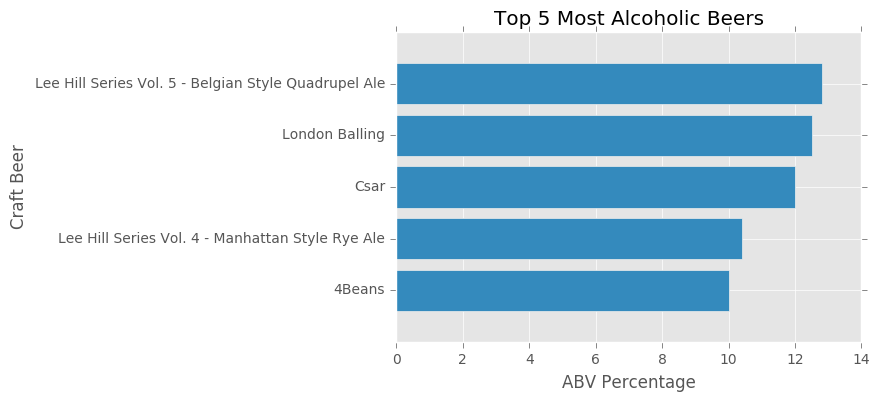

In [9]:
# Plot the top 5 most alcoholic beers
x = []
y = df['abv'].nlargest(5)
sort = df.sort_values(['abv'], ascending=False).head()['name']
for i in range(len(y)):
    x.append(i)
plt.barh(x, y, align='center')
plt.yticks(x, sort)
plt.gca().invert_yaxis()
plt.xlabel('ABV Percentage')
plt.ylabel('Craft Beer')
plt.title('Top 5 Most Alcoholic Beers')
plt.show()

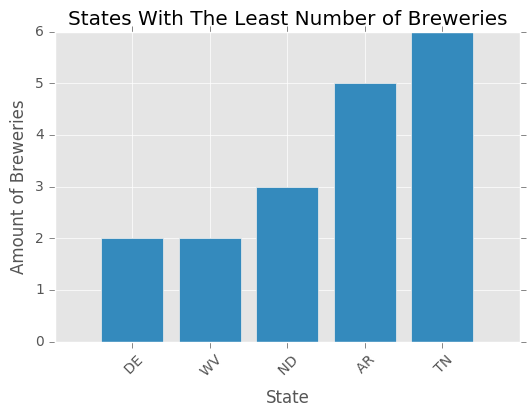

In [10]:
# Plot the 5 states with the least number of breweries
x = []
y = df['state'].value_counts().nsmallest(5)
for i in range(len(y)):
    x.append(i)
plt.bar(x, y, align='center')
plt.xticks(x, y.index.tolist(), rotation=45)
plt.xlabel('State')
plt.ylabel('Amount of Breweries')
plt.title('States With The Least Number of Breweries')
plt.show()

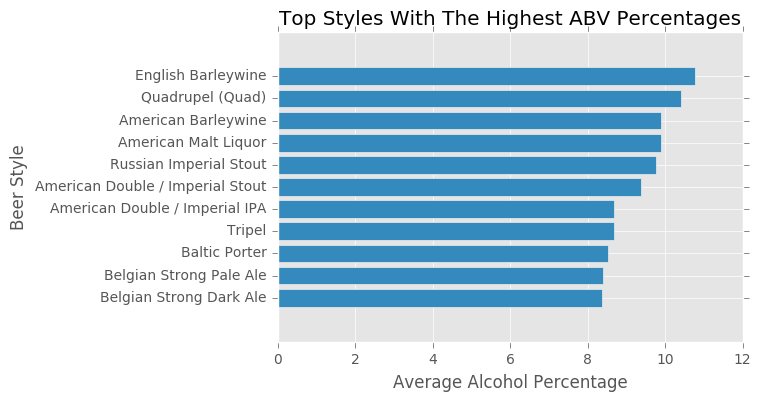

In [11]:
# Plot the styles with the highest abv percentages
x = []
y = df.groupby('style')['abv'].mean().nlargest(11)
for i in range(len(y)):
    x.append(i)
plt.barh(x, y, align='center')
plt.yticks(x, y.index.tolist())
plt.gca().invert_yaxis()
plt.xlabel('Average Alcohol Percentage')
plt.ylabel('Beer Style')
plt.title('Top Styles With The Highest ABV Percentages')
plt.show()